In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('../data/bikes.csv')
df.head()

,DC_NUM,DC_KEY,LOCATION_B,THEFT_DATE,THEFT_YEAR,DC_DIST,STOLEN_VAL,THEFT_HOUR,UCR,LAT,LNG
0,14848,2.010010e+11,2100 BLOCK S BROAD ST,4/16/2010,2010,1,150,0,625,39.924273,-75.169775
1,16330,2.010010e+11,S 2100 MCKEAN ST,4/24/2010,2010,1,215,17,615,39.927074,-75.180905
2,23568,2.010010e+11,2700 BLOCK SNYDER AVE,6/6/2010,2010,1,120,11,625,39.927120,-75.191034
3,28556,2.010010e+11,2100 BLOCK S GARNET ST,7/8/2010,2010,1,200,15,615,39.925411,-75.178257
4,29047,2.010010e+11,2100 BLOCK S 15TH ST,7/11/2010,2010,1,75,11,625,39.924141,-75.171457


In [3]:
df = df[['LOCATION_B','THEFT_DATE','THEFT_YEAR','THEFT_HOUR','STOLEN_VAL','UCR']]
df.columns = ['Location','Date','Year','Hour','Value','Value_Code']
df.head()

,Location,Date,Year,Hour,Value,Value_Code
0,2100 BLOCK S BROAD ST,4/16/2010,2010,0,150,625
1,S 2100 MCKEAN ST,4/24/2010,2010,17,215,615
2,2700 BLOCK SNYDER AVE,6/6/2010,2010,11,120,625
3,2100 BLOCK S GARNET ST,7/8/2010,2010,15,200,615
4,2100 BLOCK S 15TH ST,7/11/2010,2010,11,75,625


In [8]:
pd.options.display.mpl_style = 'default'
from matplotlib import rcParams
rcParams['figure.figsize'] = (20, 8)
rcParams['figure.dpi'] = 300

C:\Users\j7jiang\AppData\Local\Continuum\Anaconda2\envs\py35\lib\site-packages\IPython\core\interactiveshell.py:2869: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  exec(code_obj, self.user_global_ns, self.user_ns)


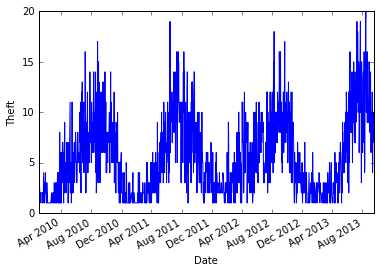

In [4]:
df['Date'] = pd.to_datetime(pd.Series(df['Date']))
df.set_index('Date', drop=False, inplace=True)

df['Thefts'] = df['Date'].value_counts()

plt.figure()
plt.ylim(0,20)
plt.ylabel('Theft')
df['Thefts'].plot(x_compat=True)


In [5]:
temp = pd.read_csv('../data/Climate.csv',
            parse_dates={'Date': ['MO','DAY','YEAR']},
            usecols=['MO', 'DAY', 'YEAR', 'HIGH'])
temp.head()


,Date,HIGH
0,2010-01-01,42
1,2010-01-02,32
2,2010-01-03,27
3,2010-01-04,32
4,2010-01-05,33


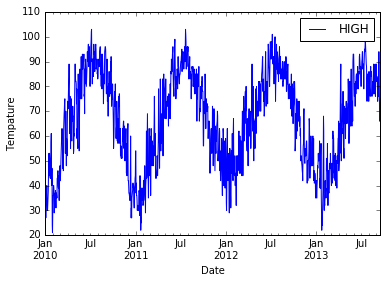

In [8]:
temp.set_index('Date', drop=False, inplace=True)
temp.plot()
plt.ylabel('Tempature')

In [10]:
#merge df and temp
merged = pd.merge(df, temp, on='Date', how='outer')
merged.columns = ['Location','Date','Year','Hour','Value','Value_Code','Thefts','Temp']

In [285]:
merged.head()

,Location,Date,Year,Hour,Value,Value_Code,Thefts,Temp
0,2100 BLOCK S BROAD ST,2010-04-16,2010,0,150,625,4,75
1,7300 BLOCK CLARIDGE ST,2010-04-16,2010,19,700,615,4,75
2,1000 BLOCK MARKET ST,2010-04-16,2010,6,100,625,4,75
3,800 BLOCK S 48TH ST,2010-04-16,2010,19,150,625,4,75
4,S 2100 MCKEAN ST,2010-04-24,2010,17,215,615,7,68


In [12]:
new = merged.sort_values('Thefts', ascending=False)
new = new.dropna()
new.head()

,Location,Date,Year,Hour,Value,Value_Code,Thefts,Temp
6734,200 BLOCK N 23RD ST,2013-08-15,2013.0,17.0,2290.0,615.0,20.0,78
6743,4600 BLOCK EMERSON ST,2013-08-15,2013.0,9.0,125.0,625.0,20.0,78
6730,S 08TH ST / PIERCE ST,2013-08-15,2013.0,0.0,135.0,625.0,20.0,78
6731,N 09TH ST / MARKET ST,2013-08-15,2013.0,16.0,120.0,625.0,20.0,78
6749,1000 BLOCK S 45TH ST,2013-08-15,2013.0,10.0,70.0,625.0,20.0,78


In [13]:
thefts = merged['Date'].value_counts()

thefts.head(10)


2013-08-15    20
2013-07-24    19
2011-06-15    19
2013-07-10    19
2013-08-14    19
2012-08-09    18
2013-07-13    18
2013-07-23    17
2010-08-26    17
2012-09-21    17
Name: Date, dtype: int64

In [14]:
#thefts per year 2013 , missing 3 months (october-december)
yearly = df.Year.value_counts()
yearly

2012    1975
2011    1848
2010    1831
2013    1569
Name: Year, dtype: int64

In [15]:
#Thefts per Month
df['Date'] = df['Date'].map(lambda x: str(x)[:2])
df['Date'] = df['Date'].map(lambda x: x.rstrip('/'))

monthly = df.Date.value_counts()
monthly


20    7223
Name: Date, dtype: int64

In [16]:
df.Hour.value_counts()

17    618
18    598
16    593
19    574
20    495
15    478
14    456
12    448
13    447
21    369
11    324
22    319
10    293
9     250
23    201
8     186
0     144
1     113
7      98
2      71
3      48
4      38
5      31
6      31
Name: Hour, dtype: int64

In [17]:
df.Value.value_counts()

200     821
100     636
300     595
500     482
150     477
400     413
250     292
600     254
0       192
350     175
1000    168
50      146
800     145
700     137
450     100
120      88
80       74
1500     71
1200     64
550      58
75       55
900      54
160      53
125      52
90       50
750      50
130      46
180      45
60       45
650      43
       ... 
826       1
126       1
105       1
878       1
918       1
237       1
606       1
473       1
434       1
469       1
326       1
2550      1
379       1
445       1
355       1
405       1
397       1
374       1
442       1
269       1
446       1
337       1
333       1
335       1
515       1
313       1
305       1
289       1
327       1
243       1
Name: Value, dtype: int64

In [18]:
df.Value_Code.value_counts()

615    4887
625    2172
635     164
Name: Value_Code, dtype: int64

In [19]:
loc = df.Location.value_counts()
loc.head(25)

1500 BLOCK MARKET ST           28
200 BLOCK S BROAD ST           27
200 BLOCK S 33RD ST            24
1700 BLOCK N 10TH ST           22
200 BLOCK S JUNIPER ST         21
200 BLOCK N 34TH ST            20
1900 BLOCK VINE ST             20
3100 BLOCK MARKET ST           20
900 BLOCK SOUTH ST             19
1100 BLOCK FILBERT ST          18
3700 BLOCK WALNUT ST           18
1800 BLOCK WALNUT ST           18
200 BLOCK S 34TH ST            17
3900 BLOCK WALNUT ST           17
1600 BLOCK CHESTNUT ST         17
3400 BLOCK SPRUCE ST           17
1100 BLOCK S BROAD ST          17
3900 BLOCK LOCUST WALK         16
3100 BLOCK LUDLOW ST           15
1800 BLOCK N 10TH ST           15
1600 BLOCK WALNUT ST           15
1300 BLOCK CECIL B MOORE AV    15
2000 BLOCK N BROAD ST          14
200 BLOCK S 36TH ST            14
4000 BLOCK WALNUT ST           14
Name: Location, dtype: int64